In [1]:
# 1. Importamos las librerías necesarias
import pandas as pd
import numpy as np
import os
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2. Cargamos los datos
# Ruta del dataset
data_path = os.path.join(os.path.dirname(os.getcwd()), 'data_sintetica', 'dataset_compras.csv')
#Cargar el dataset
df = pd.read_csv(data_path)
# Mostrar primeras filas
df.head()

,ID_Cliente,edad,ingresos,visitas_web,tiempo_web,productos_vistos,promociones_usadas,compra,monto_venta
0,C0001,30,2924.90,2.013366,-0.928528,0.893800,1.804473,0,0.00
1,C0002,33,2694.27,-0.242941,0.750742,-0.554035,1.387550,1,529.30
2,C0003,27,6515.97,-2.559062,-0.148233,-0.364018,0.355956,0,0.00
3,C0004,25,5469.12,0.887033,0.093840,-0.497945,2.831638,1,2144.86
4,C0005,28,2621.12,1.529819,-2.050463,1.430774,0.211051,0,0.00


In [3]:
# 3. Vericamos las columnas
print("Columnas disponibles:")
print(df.columns)

Columnas disponibles:
Index(['ID_Cliente', 'edad', 'ingresos', 'visitas_web', 'tiempo_web',
       'productos_vistos', 'promociones_usadas', 'compra', 'monto_venta'],
      dtype='object')


In [4]:
# 4. Definimos las variables predictoras y la variable objetivo
# Variables predictoras
X = df[['edad', 'ingresos', 'visitas_web', 'tiempo_web', 'productos_vistos', 'promociones_usadas']]

# Variable objetivo
y = df['monto_venta']

In [5]:
# 5. Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ID de clientes de test
id_test = df.loc[y_test.index, 'ID_Cliente'].reset_index(drop=True)

In [6]:
# 6. Entrenamos el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
# 7. Realizamos predicciones
y_pred = modelo.predict(X_test)

In [9]:
# 8. Evaluamos el modelo
mse = mean_squared_error(y_test, y_pred)    
r2 = r2_score(y_test, y_pred)

print(f" - Error Cuadrático Medio (MSE): {mse:.2f}")
print(f" - Coeficiente de Determinación (R²): {r2:.4f}")

 - Error Cuadrático Medio (MSE): 1878300.59
 - Coeficiente de Determinación (R²): 0.2137


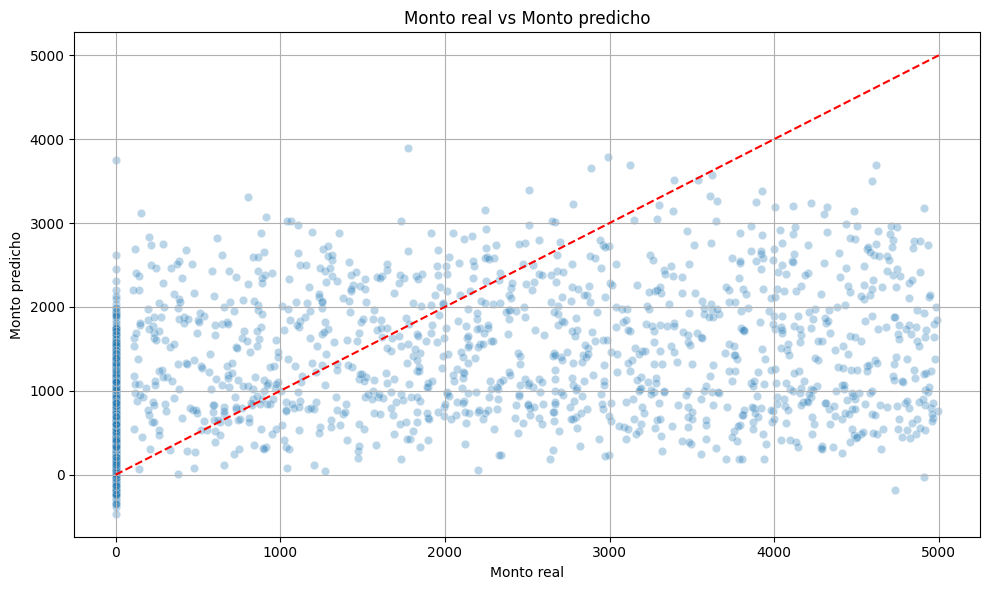

In [11]:
# 9. Visualizamos los resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title("Monto real vs Monto predicho")   
plt.xlabel("Monto real")
plt.ylabel("Monto predicho")
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
# 10. Guadamos los resultados del modelo
# Convertir resultados en DataFrame
df_resultados = pd.DataFrame({
    'ID_Cliente': id_test,
    'monto_real': y_test.reset_index(drop=True),
    'monto_predicho': y_pred.round(2),
    'error_absoluto': np.abs(y_test.reset_index(drop=True) - y_pred).round(2)
})

# Ruta de guardado
result_dir = os.path.join(os.path.dirname(os.getcwd()), 'resultados_modelos', 'regresion')
os.makedirs(result_dir, exist_ok=True)

# Nombre del archivo
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
file_name = f"resultados_regresion_lineal_{timestamp}.csv"
output_path = os.path.join(result_dir, file_name)

# Guardar en CSV
df_resultados.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f" Resultados guardados en:\n{output_path}")


 Resultados guardados en:
c:\cmder\IDL1_Machine_Learning_I\resultados_modelos\regresion\resultados_regresion_lineal_20250720_134330.csv
